In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.It is also called a moving mean (MM)[1] or rolling mean and is a type of finite impulse response filter. 

This is the key component of several optimization algorithms like RMSprop, Momentum, Adam. By itself it's considered one of the quant features. Quant i.e Quantitative analyst, someone who applies mathematical techniques to financial investment.
Let's try to gain some intuition about it below.

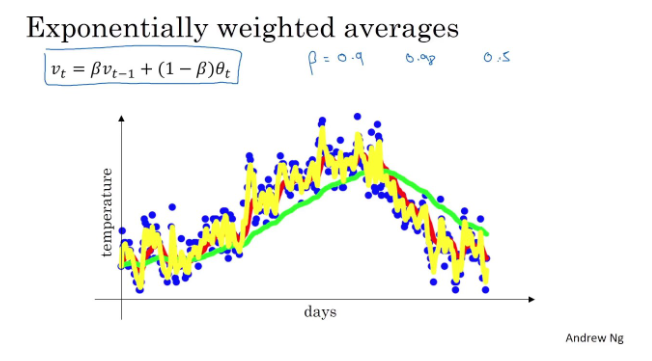

importing dependencies..

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We're going to be using London's weather dataset

In [34]:
df = pd.read_csv("C:/Users/aysen/Downloads/archive (2)/london_weather.csv")

In [35]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [36]:
df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


We're only taking 2020 temperatures of London

In [37]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['year'] = pd.to_datetime(df['date']).dt.year

In [38]:
london = df[(df["year"] == 2020)]

In [39]:
london.set_index(london['date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('date', 1)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year
date,,,,,,,,,,
2020-01-01,8.0,0.0,13.0,6.6,4.1,1.7,0.0,102980.0,NaN,2020
2020-01-02,7.0,0.0,13.0,11.1,8.6,6.2,1.0,102160.0,NaN,2020
2020-01-03,4.0,0.0,22.0,10.4,9.9,9.4,0.6,101980.0,NaN,2020
2020-01-04,7.0,2.7,36.0,9.1,5.6,2.2,0.0,103400.0,NaN,2020
2020-01-05,7.0,1.4,32.0,9.1,7.8,6.5,0.0,103380.0,NaN,2020
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020


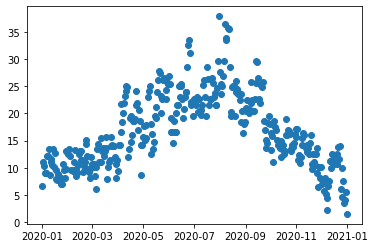

In [22]:
plt.scatter(london["date"], london["max_temp"])

The formula:

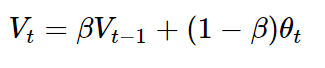

Since theta corresponds to -in our example- temperatures we're starting with theta1 so in the first iteration we need V0. But since we don't have any average yet we assign the first V value to 0. And beta helps us how the average adapts to new datapoints. How rapidly it changes.

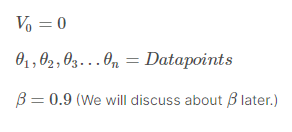

Through iteration it's going to look like this..

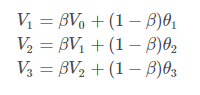

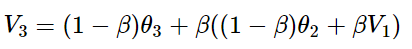

We're replacing V values with the previous ones. You can calculate V1 too so that you'll be able to find all parameters until the end.

Here's another formula. This explains the logic behind the beta.

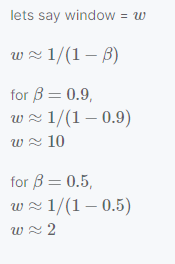

"window" means how many days in past averaging over. This formula gives what we should assign for beta.
Vt as approximately average over 1 / (1-beta) days' temperature

if beta= 0.9 that means it's covering the last 10 days. if beta= 0.98 means last 50 days, beta= 0.5 means last 2 days..

Pandas has it's own method for this. (pandas.DataFrame.ewm)
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html#pandas-dataframe-ewm

In [ ]:
london["10-EMWA"] = london.loc[:, ("max_temp")].ewm(span=10).mean()

<AxesSubplot:>

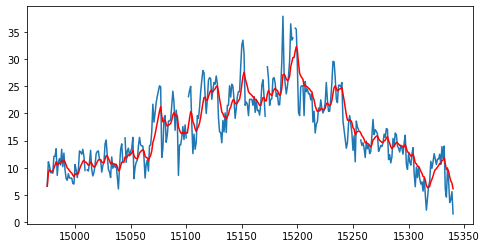

In [33]:
london["max_temp"].plot(figsize=(8,4), label="max_temp")
london["10-EMWA"].plot(color="red", label="10w-EMWA")

We implemented exponentially moving average for the past 10 days. That means beta is 0.9. Let's go ahead and try other values of beta as well such as 0.5 and 0.98

In [ ]:
london["50-EMWA"] = london.loc[:, ("max_temp")].ewm(span=50).mean()
london["02-EMWA"] = london.loc[:, ("max_temp")].ewm(span=2).mean()

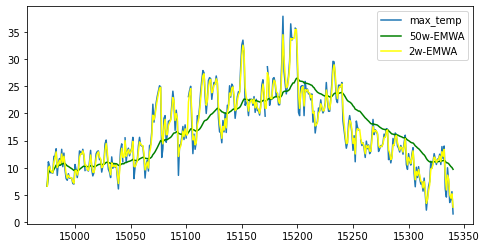

In [32]:
london["max_temp"].plot(figsize=(8,4), label="max_temp")
london["50-EMWA"].plot(color="green", label="50w-EMWA")
london["02-EMWA"].plot(color="yellow", label="2w-EMWA")
plt.legend()

beta = 0.98(50 days) is much more smoother, when temperature changes it adapts more slowly. When beta = 0.5(2 days)it adapts much more quickly. 

You should think Beta as the hyperparameter has the effect of how many days' temperatures averaging over, how many days covering. It's actually 1/(1-beta) but relatively.. beta

Where you need to compute averages of a lot of variables, this is very efficient way both for computation and memory efficiency. Even though it's not the most accurate, takes very little memory so that's why we don't just sum all of them and divide it by 10 or 50.

***Let's compare exponentially weighted average and the regular, moving average***

A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles. The threshold between short-term and long-term depends on the application, and the parameters of the moving average will be set accordingly. For example, it is often used in technical analysis of financial data, like stock prices, returns or trading volumes. It is also used in economics to examine gross domestic product, employment or other macroeconomic time series. Mathematically, a moving average is a type of convolution and so it can be viewed as an example of a low-pass filter used in signal processing. When used with non-time series data, a moving average filters higher frequency components without any specific connection to time, although typically some kind of ordering is implied. Viewed simplistically it can be regarded as smoothing the data. ---wikipedia

observations weighted exponentially

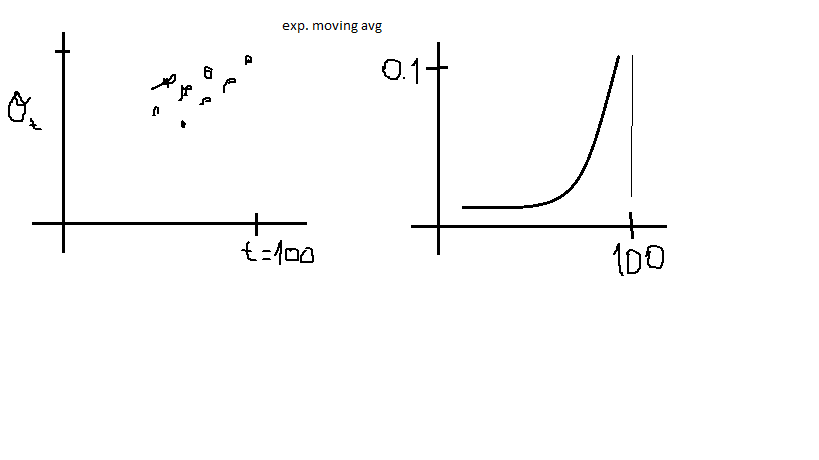

observations are weighted equally

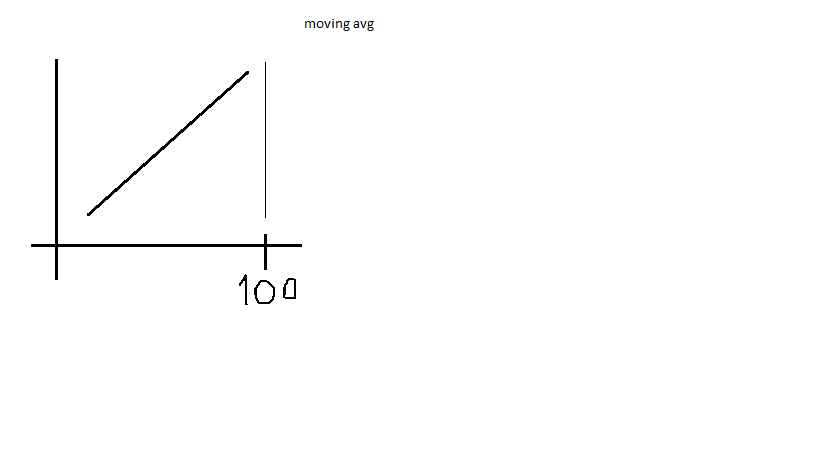

Moving average's use case in time series: Smoothing the original time series to identify trends

In [ ]:
# df.rolling(window).mean()

***Exponential smoothing***

Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Forecasting with weights decreasing exponentially towards the past.

Here's some exponentional smoothing models:

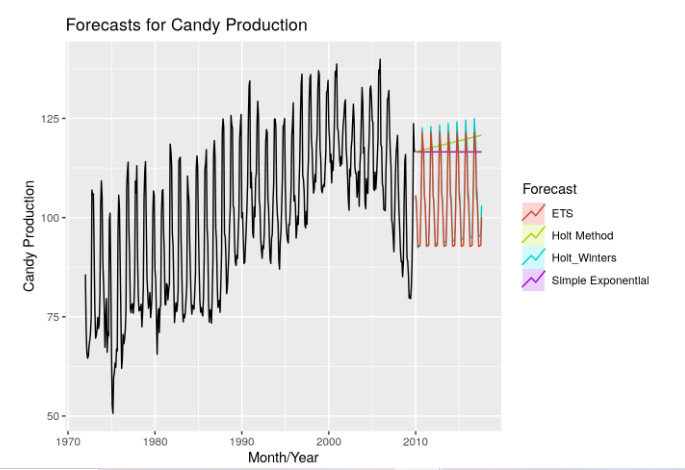

Simple exponential: smoothing for level

Holt: smoothing for level and for trend

Holt Winters: smoothing for level, trend and seasonality

ETS: It allows other combinations of trend and seasonal components